 # Lab 5: Daisyworld
 ### Christopher Rordell
 ##### EOSC 511

 ## Problem constant growth
 Note that though the daisy growth rate per unit time depends on the amount
 of available fertile land, it is not otherwise coupled to the environment
 (i.e. 𝛽𝑖 is note a function of temperature. Making the growth a function of
 bare ground, however, keeps the daisy population bounded and the daisy population
 will eventually reach some steady state. The next python cell has a script that
 runs a fixed timestep Runge Kutte routine that calculates area coverage of white
 and black daisies for fixed growth rates 𝛽𝑤 and 𝛽𝑏. Try changing these growth
 rates (specified in the derivs5 routine) and the initial white and black
 concentrations (specified in the fixed_growth.yaml file discussed next).

 $$
 \\
 $$

 - 1\) For a given set of growth rates try various (non-zero) initial daisy populations.
 <img src="/Users/crodell/repos/numeric_students/numeric_notebooks/lab5/images/initial_daisy-populations_W2_B7.png">
 <img src="/Users/crodell/repos/numeric_students/numeric_notebooks/lab5/images//initial_daisy-initial_daisy-populations_W4_B2.png">
 $$
 \\
 $$
 **See Images Folder**
 $$
 \\
 $$
 - 2\) For a given set of initial conditions try various growth rates. In particular, try rates that are both greater than and less than the death rate.
 $$
 \\
 $$
 **See Images Folder**
 $$
 \\
 $$
 - 3\) Can you determine when non-zero steady states are achieved? Explain.
 $$
 \\
 $$
 **Yes, you can determine when a non-zero steady state occurs.
 This happens when the function tends to a non zero value but stays constant with time
 Another way to say this is..**
 $$
 \begin{aligned}
 &\frac{d A_{w}}{d t}=0\\
 &\frac{d A_{b}}{d t}=0
 \end{aligned}
 $$
 **When A_w or A_b are non zero**

******************************
context imported. Front of path:
/Users/crodell/repos/numeric_students
back of path: /Users/crodell/.ipython
******************************

through /Users/crodell/repos/numeric_students/numeric_notebooks/lab5/context.py


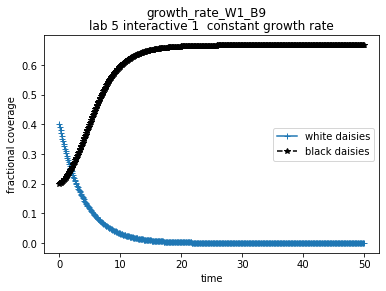

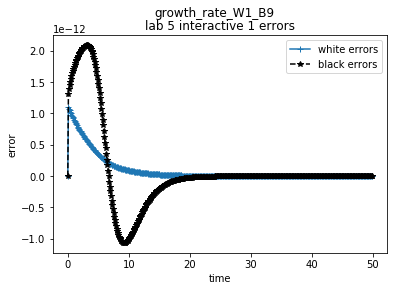

In [1]:
#
# 4.1  integrate constant growth rates with fixed timesteps
#
import context
from context import lab_dir
from numlabs.lab5.lab5_funs import Integrator
from collections import namedtuple
import numpy as np
import matplotlib.pyplot as plt


class Integ51(Integrator):
    def set_yinit(self):
        #
        # read in 'albedo_white chi S0 L albedo_black R albedo_ground'
        #
        uservars = namedtuple('uservars', self.config['uservars'].keys())
        self.uservars = uservars(**self.config['uservars'])
        #
        # read in 'whiteconc blackconc'
        #
        initvars = namedtuple('initvars', self.config['initvars'].keys())
        self.initvars = initvars(**self.config['initvars'])
        self.yinit = np.array(
            [self.initvars.whiteconc, self.initvars.blackconc])
        self.nvars = len(self.yinit)
        return None

    #
    # Construct an Integ51 class by inheriting first intializing
    # the parent Integrator class (called super).  Then do the extra
    # initialization in the set_yint function
    #
    def __init__(self, coeffFileName):
        super().__init__(coeffFileName)
        self.set_yinit()

    def derivs5(self, y, t):
        """y[0]=fraction white daisies
           y[1]=fraction black daisies

           Constant growty rates for white
           and black daisies beta_w and beta_b

           returns dy/dt
        """
        user = self.uservars
        #
        # bare ground
        #
        x = 1.0 - y[0] - y[1]

        # growth rates don't depend on temperature
        beta_b = 0.9  # growth rate for black daisies
        beta_w = 0.1  # growth rate for white daisies

        # create a 1 x 2 element vector to hold the derivitive
        f = np.empty([self.nvars], 'float')
        f[0] = y[0] * (beta_w * x - user.chi)
        f[1] = y[1] * (beta_b * x - user.chi)
        return f


theSolver = Integ51('fixed_growth.yaml')
timeVals, yVals, errorList = theSolver.timeloop5fixed()

plt.close('all')
# title_plot = 'initial_daisy-populations_W4_B2'
title_plot = 'growth_rate_W1_B9'

thefig, theAx = plt.subplots(1, 1)
thefig.suptitle(title_plot)
theLines = theAx.plot(timeVals, yVals)
theLines[0].set_marker('+')
theLines[1].set_linestyle('--')
theLines[1].set_color('k')
theLines[1].set_marker('*')
theAx.set_title('lab 5 interactive 1  constant growth rate')
theAx.set_xlabel('time')
theAx.set_ylabel('fractional coverage')
theAx.legend(theLines, ('white daisies', 'black daisies'), loc='best')
thefig.savefig(str(lab_dir)+'/images/' +str(title_plot))

thefig, theAx = plt.subplots(1, 1)
thefig.suptitle(title_plot)
theLines = theAx.plot(timeVals, errorList)
theLines[0].set_marker('+')
theLines[1].set_linestyle('--')
theLines[1].set_color('k')
theLines[1].set_marker('*')
theAx.set_title('lab 5 interactive 1 errors')
theAx.set_xlabel('time')
theAx.set_ylabel('error')
out = theAx.legend(theLines, ('white errors', 'black errors'), loc='best')
thefig.savefig(str(lab_dir)+'/images/error_' +str(title_plot))



 ## Problem Coupling
 - 1\) For the current value of L (0.2) in the file coupling.yaml,
  the final daisy steady state is zero. Why is it zero?
 $$
 \\
 $$
 **With L(0.2)  we see the final daisy steady-state to be zero because
 there isn't enough solar energy reaching the surface of Dasiyword to make
 it warm enough to allow growth for daisy. Meaning the intail Daisy on Daisyworld
  all die off as the planet is too cold to sustain Daisylife.**
 $$
 \\
 $$
 - 2\) Find a value of L which leads to a non-zero steady state.
 $$
 \\
 $$
 **Its found that at L(0.6) is close to the lower limit where Daisyworld
 reaches and non-zero steady state. L 0.6 allows just enough solar energy for the Daisys to grow.**
 $$
 \\
 $$
 - 3\) What happens to the emission temperature as L is varied? Make a plot of 𝐿 vs. 𝑇𝐸 for 10-15 values
  of 𝐿. To do this, I overrode the value of L from the init file by passing a new value into the
  IntegCoupling constructor (see Appendix A). This allowed me to put
 $$
 \\
 $$
 **Referance Code/Plot Below**
 $$
 \\
 $$
 **The Emissions Temperature [Te] levels off when the Fraction of Solar Flux Density [L()]
   approximate equals ~ L(0.6) This is where Daisyworld reaches and non-zero steady-state.
 When L become close to 1 temp does increase but would otherwise not continue as its not
 physical to have a fractional coverage above 1**


In [2]:
import matplotlib.pyplot as plt


class IntegCoupling(Integrator):
    """rewrite the init and derivs5 methods to
       work with a single (grey) daisy
    """
    def set_yinit(self, newL):
                #
        # change the luminocity
        #
        self.config["uservars"]["L"] = newL # change solar incidence fraction
        #
        # make a new namedtuple factory called uservars that includes newL
        #
        uservars_fac = namedtuple('uservars', self.config['uservars'].keys())
        #
        # use the factory to make the augmented uservars named tuple
        #
        self.uservars = uservars_fac(**self.config['uservars'])
        #


        #
        # read in 'albedo_grey chi S0 L  R albedo_ground'
        #
        uservars = namedtuple('uservars', self.config['uservars'].keys())
        self.uservars = uservars(**self.config['uservars'])
        #
        # read in 'greyconc'
        #
        initvars = namedtuple('initvars', self.config['initvars'].keys())
        self.initvars = initvars(**self.config['initvars'])
        self.yinit = np.array([self.initvars.greyconc])
        self.nvars = len(self.yinit)
        return None



    def __init__(self, coeffFileName, newL):
       super().__init__(coeffFileName)
       self.set_yinit(newL)

    def derivs5(self, y, t):
        """
           Make the growth rate depend on the ground temperature
           using the quadratic function of temperature

           y[0]=fraction grey daisies
           t = time
           returns f[0] = dy/dt
        """
        sigma = 5.67e-8  # Stefan Boltzman constant W/m^2/K^4
        user = self.uservars
        x = 1.0 - y[0]
        albedo_p = x * user.albedo_ground + y[0] * user.albedo_grey
        Te_4 = user.S0 / 4.0 * user.L * (1.0 - albedo_p) / sigma

        temp_e = Te_4**0.25
        self.temp_e = temp_e ## SAVES TO SELF!!!!

        eta = user.R * user.L * user.S0 / (4.0 * sigma)
        temp_y = (eta * (albedo_p - user.albedo_grey) + Te_4)**0.25

        self.temp_y = temp_y ## SAVES TO SELF!!!!

        if (temp_y >= 277.5 and temp_y <= 312.5):
            beta_y = 1.0 - 0.003265 * (295.0 - temp_y)**2.0
        else:
            beta_y = 0.0

        # create a 1 x 1 element vector to hold the derivative
        f = np.empty([self.nvars], np.float64)
        f[0] = y[0] * (beta_y * x - user.chi)

        return f



Text(0.5, 0, 'Fraction of Solar Flux Density L()')

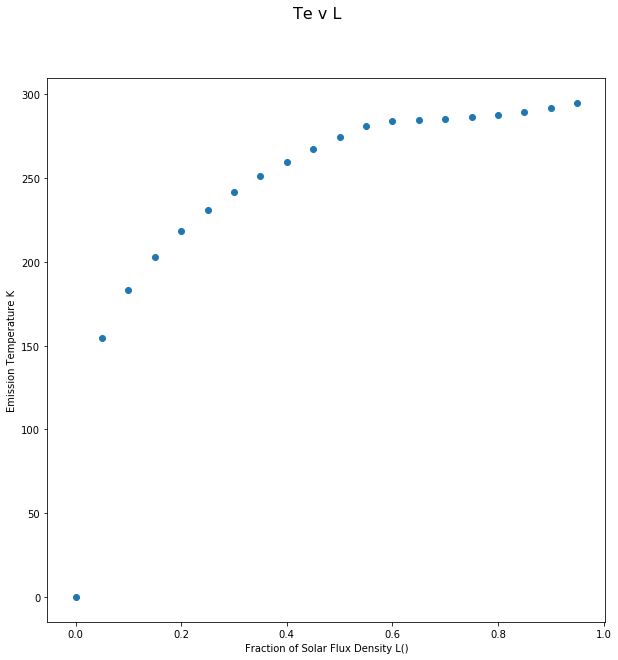

In [3]:

## make array of fractional L values
newL = np.arange(0,1,0.05)

## Loop and append temp and emssions temp based off L valuse 
temp_y_list, temp_e_list  = [], []
for L in newL:
    theSolver = IntegCoupling("coupling.yaml", L)
    timeVals, yVals, errorList = theSolver.timeloop5fixed()
    temp_y_list.append(theSolver.temp_y)
    temp_e_list.append(theSolver.temp_e)

## Plot L v Te
fig, ax = plt.subplots(1,figsize=(10,10))
fig.suptitle('Te v L', fontsize=16)
ax.scatter(newL, temp_e_list)
ax.set_ylabel('Emission Temperature K')
ax.set_xlabel('Fraction of Solar Flux Density L()')



 ## Problem Coupling cont.
 - 4\) Do you see any difference between the daisy temperature and emission temperature?
  Plot both and explain. (Hint: I modified derivs5 to save these variables to self
 so I could compare their values at the end of the simulation. You could also override
 timeloop5fixed to do the same thing at each timestep.)
 $$
 \\
 $$
 **The daisy temperature is always smaller than the emission temperature.
  This is because the planetary albedo is smaller than the gray daisy albedo.**
 \\
 $$
 **Referance Code/Plot Below**
 $$
 \\
 $$
 - 5\) How (i.e. thorugh what mechanism) does the makeup
  of the global daisy population affect the local temperature?
 $$
 \\
 $$
 **The albedo of the grey daisies and the ground albedo are affecting
 the local temperature. Interestingly as the value of the fractional
 solar flux density exceeds the albedo value of the grey daisy you
 see a non-zero steady-state. So the mechanism is that the amount of
  energy on the grey daisy needs to exceed the amount of energy going the grey dasiy reflects inorder to
  have a suitable climate for the grey daisies to live.**

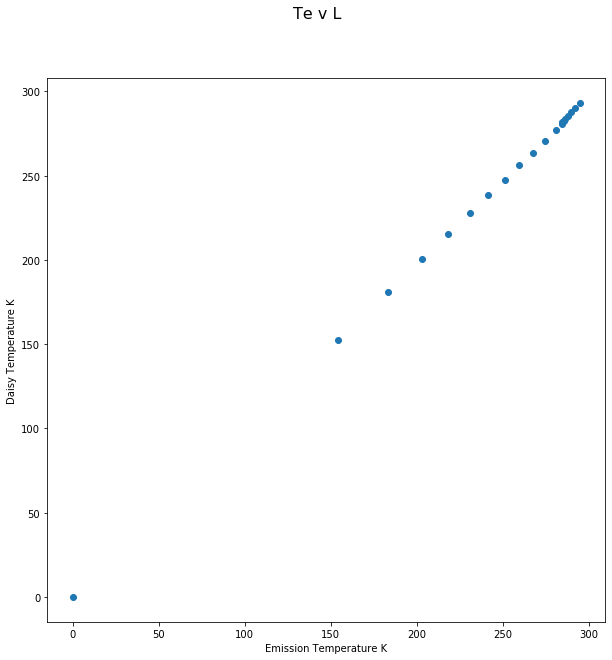

In [4]:

## Plot T v Te
fig, ax = plt.subplots(1,figsize=(10,10))
fig.suptitle('Te v L', fontsize=16)
ax.scatter(temp_e_list, temp_y_list)
ax.set_xlabel('Emission Temperature K')
ax.set_ylabel('Daisy Temperature K')

dif = temp_e_list[1]-temp_y_list[1]




 ## Problem initial

 - 1\) Add a small initial fraction of black daisies (say, 0.01) to the value in initial.yaml
 and see what effect this has on the temperature and final daisy populations.
 Do you still have a final non-zero daisy population?
 $$
 \\
 $$
 **By adding 0.01 making the initial fraction of black daisies to be 0.04
 in the initial.yaml we see little to no differnace in the daisy population.
 The fractional coverage of the wihite and black
 daises are ~0.64, ~0.13 respectively. As for temeprature there is a minor increase for both types of daises **
 $$
 \\
 $$
 - 2\) Attempt to adjust the initial white daisy population to obtain a non-zero steady
  state. Do you have to increase or decrease the initial fraction? What is your
 explanation for this behavior?
 $$
 \\
 $$
 **For there to be a non zero steady-state white daisy population you need the keep the fractional
  difference above 0.2 (this assumes no change to the black daisy fractional diff coverage ).
 For a non zero steady-state to occur means that the white daisy growth rate must be non zero.
  The growth rate depends on the daisy temperature which depends on the emission temperature,
   solar luminosities, and total albedo of Daiyworld. So basically to sustain the white daisy
  population you need a temperature that the find habitable.**
 $$
 \\
 $$
 - 3\) Experiment with other initial fractions of daisies and
 look for non-zero steady states.
 $$
 \\
 $$
 **In order for non zero steady-state conditions to occur on Daisy World, you need the black
 daisy population to be small relative to the white daisy population. Effectively meaning
 that the albedo needs to be high enough the keep temperatures habitable for the daisy to lives**

In [5]:
from numlabs.lab5.lab5_funs import Integrator


class Integ54(Integrator):
    def set_yinit(self):
        #
        # read in 'albedo_white chi S0 L albedo_black R albedo_ground'
        #
        uservars = namedtuple('uservars', self.config['uservars'].keys())
        self.uservars = uservars(**self.config['uservars'])
        #
        # read in 'whiteconc blackconc'
        #
        initvars = namedtuple('initvars', self.config['initvars'].keys())
        self.initvars = initvars(**self.config['initvars'])
        self.yinit = np.array(
            [self.initvars.whiteconc, self.initvars.blackconc])
        self.nvars = len(self.yinit)
        return None

    def __init__(self, coeff_file_name):
        super().__init__(coeff_file_name)
        self.set_yinit()
        ######################################################
        ####################### Temp Q.1 #####################
        self.temp_w_list, self.temp_b_list, self.temp_e_list = [], [], []
        self.beta_b_list, self.beta_w_list = [], []
        ######################################################


    def find_temp(self, yvals):
        """
            Calculate the temperatures over the white and black daisies
            and the planetary equilibrium temperature given the daisy fractions

            input:  yvals -- array of dimension [2] with the white [0] and black [1]
                    daisy fractiion
            output:  white temperature (K), black temperature (K), equilibrium temperature (K)
        """
        sigma = 5.67e-8  # Stefan Boltzman constant W/m^2/K^4
        user = self.uservars
        bare = 1.0 - yvals[0] - yvals[1]
        albedo_p = bare * user.albedo_ground + \
            yvals[0] * user.albedo_white + yvals[1] * user.albedo_black
        Te_4 = user.S0 / 4.0 * user.L * (1.0 - albedo_p) / sigma
        temp_e = Te_4**0.25
        eta = user.R * user.L * user.S0 / (4.0 * sigma)
        temp_b = (eta * (albedo_p - user.albedo_black) + Te_4)**0.25
        temp_w = (eta * (albedo_p - user.albedo_white) + Te_4)**0.25


        return (temp_w, temp_b, temp_e)

    def derivs5(self, y, t):
        """y[0]=fraction white daisies
           y[1]=fraction black daisies
           no feedback between daisies and
           albedo_p (set to ground albedo)
        """
        temp_w, temp_b, temp_e = self.find_temp(y)

        if (temp_b >= 277.5 and temp_b <= 312.5):
            beta_b = 1.0 - 0.003265 * (295.0 - temp_b)**2.0
        else:
            beta_b = 0.0

        if (temp_w >= 277.5 and temp_w <= 312.5):
            beta_w = 1.0 - 0.003265 * (295.0 - temp_w)**2.0
        else:
            beta_w = 0.0
        ######################################################
        ####################### Temp Q.1 #####################
        self.beta_b = beta_b
        self.beta_w = beta_w
        ######################################################

        user = self.uservars
        bare = 1.0 - y[0] - y[1]
        # create a 1 x 2 element vector to hold the derivitive
        f = np.empty_like(y)
        f[0] = y[0] * (beta_w * bare - user.chi)
        f[1] = y[1] * (beta_b * bare - user.chi)

        # self.temp_e = temp_e
        # self.temp_b = temp_b
        # self.temp_w = temp_w
        return f

    def timeloop5fixed(self):
        """fixed time step with
        estimated errors
        """
        t = self.timevars
        yold = self.yinit
        yError = np.zeros_like(yold)
        yvals = [yold]
        # self.temp_w, self.temp_b, self.temp_e = [], [], []
        errorList = [yError]
        timeSteps = np.arange(t.tstart, t.tend, t.dt)
        for theTime in timeSteps[:-1]:
            yold, yError, newTime = self.rkckODE5(yold, theTime, t.dt)
            temp_wi, temp_bi, temp_ei = self.find_temp(yold)
            ######################################################
            ####################### Temp Q.1 #####################

            self.temp_w_list.append(temp_wi)
            self.temp_b_list.append(temp_bi)
            self.temp_e_list.append(temp_ei)

            self.beta_b_list.append(self.beta_b)
            self.beta_w_list.append(self.beta_w)
            ######################################################
            yvals.append(yold)
            errorList.append(yError)

        yvals = np.array(yvals).squeeze()
        errorVals = np.array(errorList).squeeze()
        return (timeSteps, yvals, errorVals)


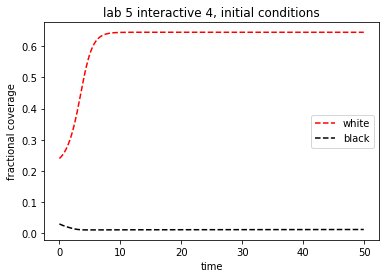

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

theSolver = Integ54('initial.yaml')
timevals, yvals, errorlist = theSolver.timeloop5fixed()
daisies = pd.DataFrame(yvals, columns=['white', 'black'])

thefig, theAx = plt.subplots(1, 1)
line1, = theAx.plot(timevals, daisies['white'])
line2, = theAx.plot(timevals, daisies['black'])
line1.set(linestyle='--', color='r', label='white')
line2.set(linestyle='--', color='k', label='black')
theAx.set_title('lab 5 interactive 4, initial conditions')
theAx.set_xlabel('time')
theAx.set_ylabel('fractional coverage')
out = theAx.legend(loc='center right')


 ## Problem Temperature
 -1\) Override `timeloop5fixed` so that it saves these three temperatures,
  plus the daisy growth rates to new variables in the Integ54 instance
 $$
 \\
 $$
 **See code cell above ihave commented where I made this happen**

 - 2\) Make plots of (temp_w, temp_b) and (beta_w, beta_b) vs. time for
  a case with non-zero equilibrium concentrations of both black and white daisies
 $$
 \\
 $$
 **SEE BELOW**

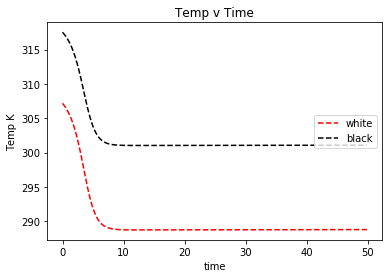

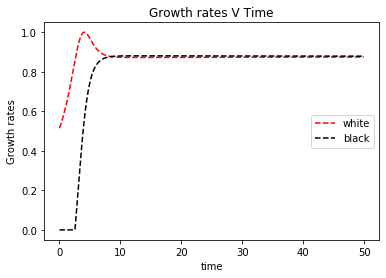

In [7]:


thefig, theAx = plt.subplots(1, 1)
line1, = theAx.plot(timevals[:-1], theSolver.temp_w_list )
line2, = theAx.plot(timevals[:-1], theSolver.temp_b_list )
line1.set(linestyle='--', color='r', label='white')
line2.set(linestyle='--', color='k', label='black')
theAx.set_title('Temp v Time')
theAx.set_xlabel('time')
theAx.set_ylabel('Temp K')
out = theAx.legend(loc='center right')

thefig, theAx = plt.subplots(1, 1)
line1, = theAx.plot(timevals[:-1], theSolver.beta_w_list )
line2, = theAx.plot(timevals[:-1], theSolver.beta_b_list )
line1.set(linestyle='--', color='r', label='white')
line2.set(linestyle='--', color='k', label='black')
theAx.set_title('Growth rates V Time')
theAx.set_xlabel('time')
theAx.set_ylabel('Growth rates')
out = theAx.legend(loc='center right')


 ## Problem Estimate
 - 1\) Play with the time step and final time, attempting small
 changes at first. How reasonable is the error estimate?
 $$
 \\
 $$
 **The error estimate remains smaller than the actual
 error until you apply really large steps or short final run times.**
 $$
 \\
 $$
 - 2\) Keep decreasing the time step. Does the error estimate diverge from the computed error? Why?
 $$
 \\
 $$
 **Yes, the error estimate diverges from the computed error at small time steps.
 This is because the initial conditions applied to the estimate approximation
 cant resolve such small time steps.**
 $$
 \\
 $$
 - 3\) Keep increasing the time step. Does the error estimate diverge? What is happening with the numerical solution?
 $$
 \\
 $$
 **You only see a divergence in error from the fixed time step. This is because using a really large time
 step makes for an unstable solution... when not applying an adaptive time step that is.**

In [8]:
from numlabs.lab5.lab5_funs import Integrator


class Integ55(Integrator):
    def set_yinit(self):
        #
        # read in 'c1 c2 c3'
        #
        uservars = namedtuple('uservars', self.config['uservars'].keys())
        self.uservars = uservars(**self.config['uservars'])
        #
        # read in initial yinit
        #
        initvars = namedtuple('initvars', self.config['initvars'].keys())
        self.initvars = initvars(**self.config['initvars'])
        self.yinit = np.array([self.initvars.yinit])
        self.nvars = len(self.yinit)
        return None

    def __init__(self, coeff_file_name):
        super().__init__(coeff_file_name)
        self.set_yinit()

    def derivs5(self, y, theTime):
        """
           y[0]=fraction white daisies
        """
        user = self.uservars
        f = np.empty_like(self.yinit)
        f[0] = user.c1 * y[0] + user.c2 * theTime + user.c3
        return f


Text(0.5, 1.0, 'lab 5 interactive 5 -- fixed errors')

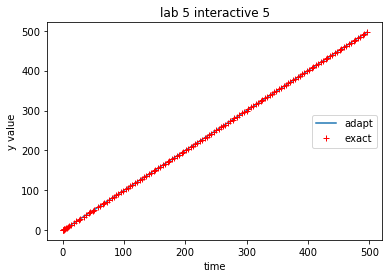

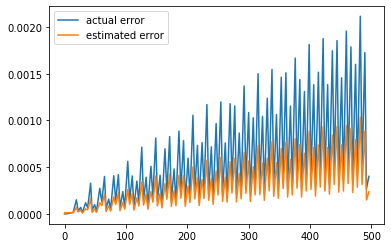

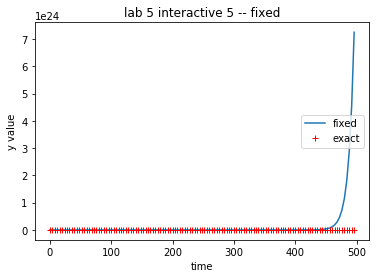

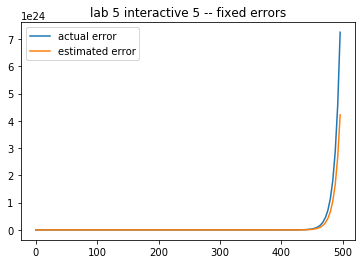

In [9]:
import matplotlib.pyplot as plt

theSolver = Integ55('expon.yaml')

timeVals, yVals, yErrors = theSolver.timeloop5Err()
timeVals = np.array(timeVals)
exact = timeVals + np.exp(-timeVals)
yVals = np.array(yVals)
yVals = yVals.squeeze()
yErrors = np.array(yErrors)

thefig, theAx = plt.subplots(1, 1)
line1 = theAx.plot(timeVals, yVals, label='adapt')
line2 = theAx.plot(timeVals, exact, 'r+', label='exact')
theAx.set_title('lab 5 interactive 5')
theAx.set_xlabel('time')
theAx.set_ylabel('y value')
theAx.legend(loc='center right')

#
# we need to unpack yvals (a list of arrays of length 1
# into an array of numbers using a list comprehension
#

thefig, theAx = plt.subplots(1, 1)
realestError = yVals - exact
actualErrorLine = theAx.plot(timeVals, realestError, label='actual error')
estimatedErrorLine = theAx.plot(timeVals, yErrors, label='estimated error')
theAx.legend(loc='best')

timeVals, yVals, yErrors = theSolver.timeloop5fixed()

np_yVals = np.array(yVals).squeeze()
yErrors = np.array(yErrors)
np_exact = timeVals + np.exp(-timeVals)

thefig, theAx = plt.subplots(1, 1)
line1 = theAx.plot(timeVals, np_yVals, label='fixed')
line2 = theAx.plot(timeVals, np_exact, 'r+', label='exact')
theAx.set_title('lab 5 interactive 5 -- fixed')
theAx.set_xlabel('time')
theAx.set_ylabel('y value')
theAx.legend(loc='center right')

thefig, theAx = plt.subplots(1, 1)
realestError = np_yVals - np_exact
actualErrorLine = theAx.plot(timeVals, realestError, label='actual error')
estimatedErrorLine = theAx.plot(timeVals, yErrors, label='estimated error')
theAx.legend(loc='best')
theAx.set_title('lab 5 interactive 5 -- fixed errors')


 ## Problem adaptive
 - 1/) Run the code and find solutions of Daisyworld with the default settings found in
  adapt.yaml using the timeloop5Err adaptive code.
 $$
 \\
 $$
 **SEE CODE/PLOT BLOCK BELOW**
 $$
 \\
 $$
 - 2\) Find the solutions again but this time with fixed stepsizes and compare
 the size of the timesteps and number of the timesteps.
 $$
 \\
 $$
 **SEE CODE/PLOT BLOCK BELOW**
 $$
 \\
 $$
 **Fixed uses many more time steps than the adaptive. The adaptive use less and the time steps increase the further in time the solution runs. **
 $$
 \\
 $$
 - 3\) How much faster does the fixed timeloop need to be to give the
 same performance as the adaptive timeloop for this case?
 $$
 \\
 $$
 **SEE PRINT STATEMENT BELOW**
 $$
 \\
 $$
 **On my compute it runs `Adaptive runs 0.008301905394410251 time faster than fixed`**

My program took 0.007612943649291992 to run
My program took 0.9006578922271729 to run
Adaptive runs 0.008452647464695486 time faster than fixed


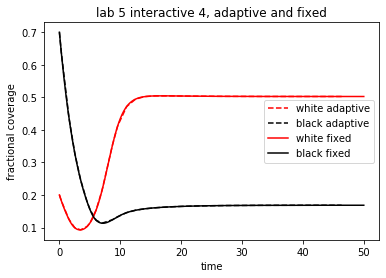

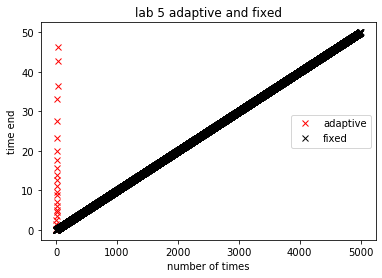

In [10]:

import matplotlib.pyplot as plt
import pandas as pd
import time

## Adaptive
theSolver = Integ54('adapt.yaml')
start_time_adaptive = time.time()
timevals_adaptive, yvals_adaptive, errorlist_adaptive = theSolver.timeloop5Err()
end_time_adaptive = time.time()
adaptive_diff = end_time_adaptive - start_time_adaptive
print("My program took", end_time_adaptive - start_time_adaptive, "to run")

daisies_adaptive = pd.DataFrame(yvals_adaptive, columns=['white', 'black'])

## Fixed
theSolver = Integ54('adapt.yaml')
start_time = time.time()
timevals, yvals, errorlist = theSolver.timeloop5fixed()
end_time = time.time()
fixed_diff = end_time - start_time
print("My program took", end_time - start_time, "to run")

daisies = pd.DataFrame(yvals, columns=['white', 'black'])


factor = (float(adaptive_diff)/float(fixed_diff))
print("Adaptive runs", factor, 'time faster than fixed')

thefig, theAx = plt.subplots(1, 1)
line1, = theAx.plot(timevals_adaptive, daisies_adaptive['white'])
line2, = theAx.plot(timevals_adaptive, daisies_adaptive['black'])
line1.set(linestyle='--', color='r', label='white adaptive')
line2.set(linestyle='--', color='k', label='black adaptive')

line3, = theAx.plot(timevals, daisies['white'])
line4, = theAx.plot(timevals, daisies['black'])
line3.set(color='r', label='white fixed')
line4.set(color='k', label='black fixed')

theAx.set_title('lab 5 interactive 4, adaptive and fixed')
theAx.set_xlabel('time')
theAx.set_ylabel('fractional coverage')
out = theAx.legend(loc='center right')



thefig, theAx = plt.subplots(1, 1)
line1, = theAx.plot(timevals_adaptive, 'x')
line2, = theAx.plot(timevals, 'x')
line1.set(color='r', label='adaptive')
line2.set(color='k', label='fixed')
theAx.set_title('lab 5 adaptive and fixed')
theAx.set_xlabel('number of times')
theAx.set_ylabel('time end')
out = theAx.legend(loc='center right')

# theSolver = Integ54('initial.yaml')
# timevals, yvals, errorlist = theSolver.timeloop5fixed()
# daisies = pd.DataFrame(yvals, columns=['white', 'black'])

# thefig, theAx = plt.subplots(1, 1)
# line1, = theAx.plot(timevals, daisies['white'])
# line2, = theAx.plot(timevals, daisies['black'])
# line1.set(linestyle='--', color='r', label='white')
# line2.set(linestyle='--', color='k', label='black')
# theAx.set_title('lab 5 interactive 4, initial conditions')
# theAx.set_xlabel('time')
# theAx.set_ylabel('fractional coverage')
# out = theAx.legend(loc='center right')

 ## Problem Predator
 - 1\) Show your modified Daisyworld equations and your new integrator class.
 **RAN OUT OF TIME WILL COME TO OFFICE HOURS AND LEARN**